This project analyzes public opinion about the 'Makan Bergizi Gratis' program, a free nutritious meal initiative provided by Indonesian government, by leveraging sentiment analysis on X (formerly Twitter).

Data training source: https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia

In [ ]:
import pandas as pd

tweet_tv = pd.read_csv('dataset_tweet_sentimen_tayangan_tv.csv', delimiter=',')
tweet_provider = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv', delimiter=',')
tweet_film = pd.read_csv('dataset_tweet_sentiment_opini_film.csv', delimiter=',')
tweet_election = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv', delimiter=',')

In [ ]:
print(tweet_tv.head())

   Id Sentiment           Acara TV  Jumlah Retweet  \
0   1  positive  HitamPutihTransTV              12   
1   2  positive  HitamPutihTransTV               6   
2   3  positive  HitamPutihTransTV               9   
3   4  positive  HitamPutihTransTV               2   
4   5  positive  HitamPutihTransTV               1   

                                          Text Tweet  
0  Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  
1  Selamat berbuka puasa Semoga amal ibadah hari ...  
2  Ada nih di trans7 hitam putih, dia dpt penghar...  
3        selamat ya mas @adietaufan masuk hitamputih  
4                  Asiknya nonton Hitam Putih Trans7  


In [ ]:
#tweet_tv = tweet_tv.drop('Acara TV', axis=1)
#tweet_tv = tweet_tv.drop('Jumlah Retweet', axis=1)

tweet_tv = tweet_tv.reindex(columns=['Id', 'Text Tweet', 'Sentiment'])
print(tweet_tv.head())

   Id                                         Text Tweet Sentiment
0   1  Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  positive
1   2  Selamat berbuka puasa Semoga amal ibadah hari ...  positive
2   3  Ada nih di trans7 hitam putih, dia dpt penghar...  positive
3   4        selamat ya mas @adietaufan masuk hitamputih  positive
4   5                  Asiknya nonton Hitam Putih Trans7  positive


In [ ]:
print(tweet_election.head())

   Id Sentiment Pasangan Calon  \
0   1  negative     Agus-Sylvi   
1   2  negative     Agus-Sylvi   
2   3  negative     Agus-Sylvi   
3   4  negative     Agus-Sylvi   
4   5  negative     Agus-Sylvi   

                                          Text Tweet  
0  Banyak akun kloning seolah2 pendukung #agussil...  
1  #agussilvy bicara apa kasihan yaa...lap itu ai...  
2  Kalau aku sih gak nunggu hasil akhir QC tp lag...  
3  Kasian oh kasian dengan peluru 1milyar untuk t...  
4  Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...  


In [ ]:
tweet_election = tweet_election.drop('Pasangan Calon', axis=1)
tweet_election = tweet_election.reindex(columns=['Id', 'Text Tweet', 'Sentiment'])
print(tweet_tv.head())

   Id                                         Text Tweet Sentiment
0   1  Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  positive
1   2  Selamat berbuka puasa Semoga amal ibadah hari ...  positive
2   3  Ada nih di trans7 hitam putih, dia dpt penghar...  positive
3   4        selamat ya mas @adietaufan masuk hitamputih  positive
4   5                  Asiknya nonton Hitam Putih Trans7  positive


In [ ]:
tweet_provider = tweet_provider.reindex(columns=['Id', 'Text Tweet', 'Sentiment'])
print(tweet_provider.head())

   Id                                         Text Tweet Sentiment
0   1  <USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...  positive
1   2  Saktinya balik lagi, alhamdulillah :v <PROVIDE...  positive
2   3  Selamat pagi <PROVIDER_NAME>  bisa bantu kenap...  negative
3   4  Dear <PROVIDER_NAME> akhir2 ini jaringan data ...  negative
4   5            Selamat malam PENDUSTA <PROVIDER_NAME>   negative


In [ ]:
tweet_film = tweet_film.reindex(columns=['Id', 'Text Tweet', 'Sentiment'])
print(tweet_film.head())

   Id                                         Text Tweet Sentiment
0   1  Jelek filmnya... apalagi si ernest gak mutu bg...  negative
1   2  Film king Arthur ini film paling jelek dari se...  negative
2   3  @beexkuanlin Sepanjang film gwa berkata kasar ...  negative
3   4  Ane ga suka fast and furious..menurutku kok je...  negative
4   5  @baekhyun36 kan gua ga tau film nya, lu bilang...  negative


In [ ]:
data_list = [tweet_tv, tweet_provider, tweet_film, tweet_election]
data_tweets = pd.concat(data_list)
print(data_tweets.tail())

      Id                                         Text Tweet Sentiment
895  896  Kali saja bpk @aniesbaswedan @sandiuno lihat, ...  positive
896  897  Kita harus dapat merangkul semua orang tanpa b...  positive
897  898  Ini jagoanku dibidang digital <Smiling Face Wi...  positive
898  899               #PesanBijak #OkeOce #GubernurGu3 ...  positive
899  900  Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...  positive


**Pre-processing**

In [ ]:
import re

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#', '', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    return tweet


In [ ]:
# Load custom stopwords from CSV
stopwords_df = pd.read_csv("stopword.csv")
# Assuming the first column contains the stopwords and it is the index
custom_stopwords = stopwords_df.index.tolist() # Use index to get the stopwords

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')  # Download tokenizer

def clean_and_remove_stopwords(text, stopwords):
    # Remove special characters and convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()

    # Tokenize and remove stopwords
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
data_tweets["Cleaned_Tweet"] = data_tweets["Text Tweet"].apply(
    lambda x: clean_and_remove_stopwords(x, custom_stopwords)
)

data_tweets.to_csv("cleaned_dataset.csv", index=False)
dataset = data_tweets

In [ ]:
print(data_tweets.head())

   Id                                         Text Tweet Sentiment  \
0   1  Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  positive   
1   2  Selamat berbuka puasa Semoga amal ibadah hari ...  positive   
2   3  Ada nih di trans7 hitam putih, dia dpt penghar...  positive   
3   4        selamat ya mas @adietaufan masuk hitamputih  positive   
4   5                  Asiknya nonton Hitam Putih Trans7  positive   

                                       Cleaned_Tweet  
0  undang ke hitamputih pemenang ssk jkt48 harusn...  
1  selamat berbuka puasa semoga amal ibadah hari ...  
2  ada nih di trans7 hitam putih dia dpt pengharg...  
3                    selamat ya mas masuk hitamputih  
4                  asiknya nonton hitam putih trans7  


In [ ]:
print(dataset.head())

   Id                                         Text Tweet Sentiment  \
0   1  Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  positive   
1   2  Selamat berbuka puasa Semoga amal ibadah hari ...  positive   
2   3  Ada nih di trans7 hitam putih, dia dpt penghar...  positive   
3   4        selamat ya mas @adietaufan masuk hitamputih  positive   
4   5                  Asiknya nonton Hitam Putih Trans7  positive   

                                       Cleaned_Tweet  
0  undang ke hitamputih pemenang ssk jkt48 harusn...  
1  selamat berbuka puasa semoga amal ibadah hari ...  
2  ada nih di trans7 hitam putih dia dpt pengharg...  
3                    selamat ya mas masuk hitamputih  
4                  asiknya nonton hitam putih trans7  


**Data Distribution**

In [ ]:
print(dataset['Sentiment'].value_counts())


Sentiment
negative    911
positive    889
Name: count, dtype: int64


**Feature extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['Cleaned_Tweet'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset['Cleaned_Tweet'])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, dataset['Sentiment'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.87      0.76      0.81       187
    positive       0.77      0.88      0.82       173

    accuracy                           0.82       360
   macro avg       0.82      0.82      0.82       360
weighted avg       0.82      0.82      0.82       360



**Sentiment Analysis on 'Makan Bergizi Gratis' Program**

In [ ]:
import pandas as pd

# Load the cleaned tweets CSV
tweets_df = pd.read_csv("cleaned_scrapped_tweets.csv", delimiter=',')

# Display the first few rows to check the data
print(tweets_df.head())

              Tweet ID                                               Text  \
0  1880816057373675642  Mari Dukung dan Sukseskan Program Makan Bergiz...   
1  1880816034715935156  RT @NewTread_: Jadi ini video yang buat kontro...   
2  1880816031314444424  Mari Dukung dan Sukseskan Program Makan Bergiz...   
3  1880816004231839969  Mari Dukung dan Sukseskan Program Makan Bergiz...   
4  1880815973571399894  RT @anasurbaningrum: Ada anak komentar soal ra...   

                                       Cleaned_Tweet  
0  mari dukung dan sukseskan program makan bergiz...  
1  jadi ini video yang buat kontroversi makan ber...  
2  mari dukung dan sukseskan program makan bergiz...  
3  mari dukung dan sukseskan program makan bergiz...  
4  ada anak komentar soal rasa menu makan gratis ...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Load pre-trained vectorizer and model
# Assuming 'dataset' contains your training data
vectorizer = TfidfVectorizer()
vectorizer.fit(dataset['Cleaned_Tweet'])  # Fit the vectorizer to your training data

model = MultinomialNB()
# Fit the model to your training data
# Assuming X_train and y_train are your training features and labels
model.fit(X_train, y_train) # This line is added to fit the model

# Apply the vectorizer to the Cleaned_Tweet column
X = vectorizer.transform(tweets_df['Cleaned_Tweet'])

In [ ]:
# Predict sentiment (positive=1, negative=0)
predictions = model.predict(X)

# Add the predictions to the DataFrame (you can choose sentiment labels like "positive" or "negative")
tweets_df['Sentiment'] = ['Positive' if pred == 1 else 'Negative' for pred in predictions]

# Check the updated DataFrame
# print(tweets_df.head())

#Save results
tweets_df.to_csv("tweets_sentiment_results.csv", index=False)


**Summary Result**

In [ ]:
# Assuming probabilities are from model.predict_proba(X)
probabilities = model.predict_proba(X)  # X is the vectorized data
predictions = [1 if prob[1] > 0.7 else 0 for prob in probabilities]
tweets_df['Sentiment'] = ['Positive' if pred == 1 else 'Negative' for pred in predictions]
print(tweets_df['Sentiment'].value_counts())


Sentiment
Negative    58
Positive    42
Name: count, dtype: int64


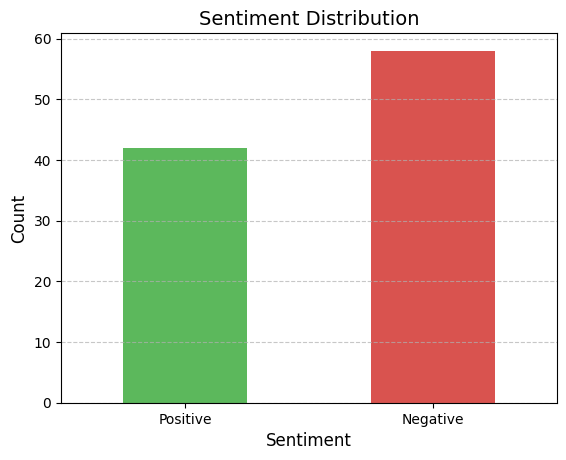

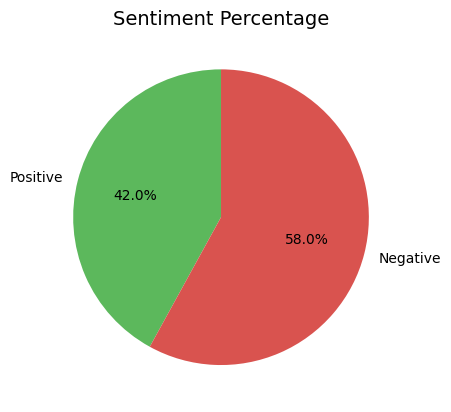

In [ ]:
import matplotlib.pyplot as plt

# Define improved colors
red_color = "#D9534F"  # Soft red
green_color = "#5CB85C"  # Soft green

# Sort sentiment counts to ensure "Positive" comes first
sentiment_counts = tweets_df['Sentiment'].value_counts()
sentiment_counts = sentiment_counts[['Positive', 'Negative']]  # Reorder explicitly

# Bar chart of sentiment counts
sentiment_counts.plot(kind='bar', color=[green_color, red_color])  # Green for Positive, Red for Negative
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie chart of sentiment percentages
sentiment_counts_normalized = sentiment_counts / sentiment_counts.sum()
sentiment_counts_normalized.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=[green_color, red_color],
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title('Sentiment Percentage', fontsize=14)
plt.ylabel('')
plt.show()



From the pie chart in the image, the conclusion would be:

*   The sentiment distribution shows that 42% of the tweets are positive, while 58% are negative.
*   This indicates that the overall sentiment is more negative than positive for the analyzed tweets.